In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy import stats
import time
import pickle

import sys
sys.path.append("../Models/")
import mod_L63 as L63
import mod_coupledLorenz as cL63

## Coupled Lorenz-63 system

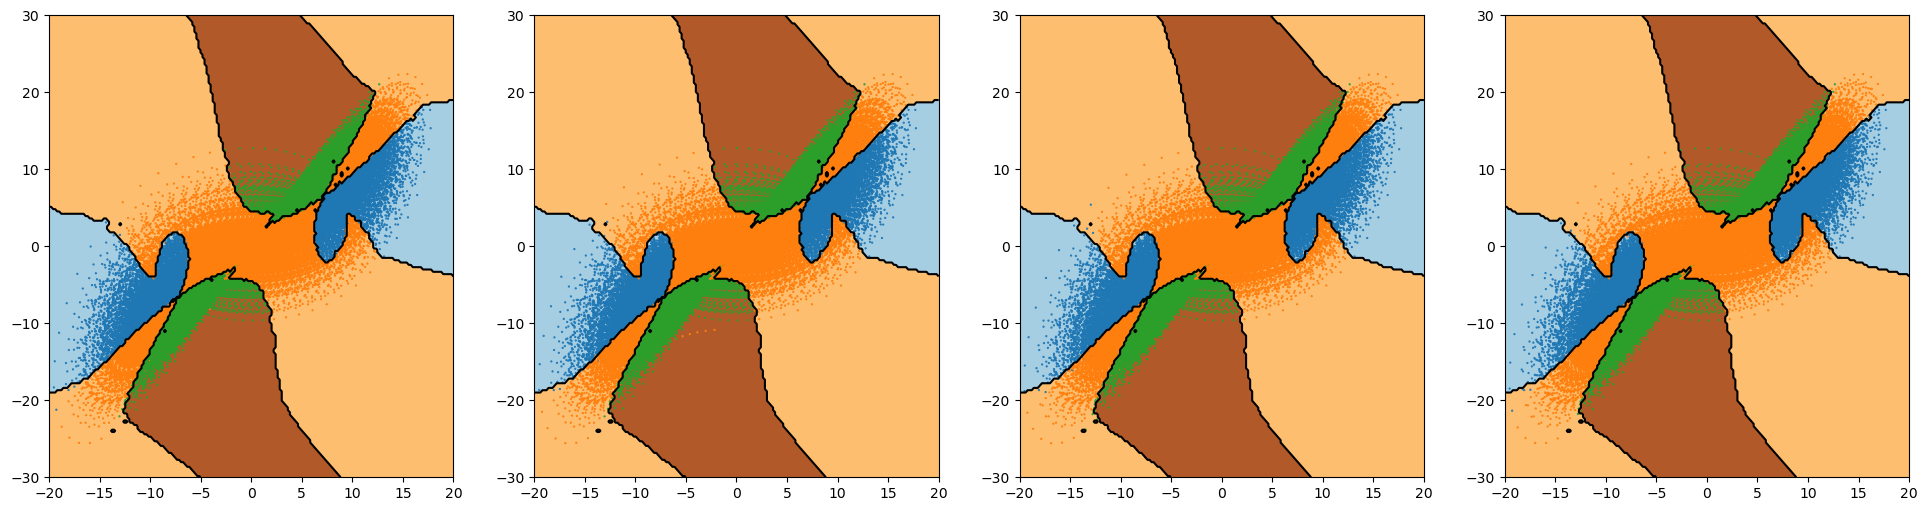

In [2]:
# Machine learning for distribution recognizing
fName = 'kNN_cl63_n4.pkl'
with open('./data/'+fName,'rb') as f:
    clf = pickle.load(f)
    scaler = pickle.load(f)
    info = pickle.load(f)

# Parameters from file
integrationMethod = info['integrationMethod']
p = info['p']
w = info['w']
c = info['c']
n = info['n']
SV_init = info['SV_init']
t_span = info['t_span']
dt = info['dt']
t_eval = np.arange(t_span[0],t_span[1],dt)

# Solve Lorenz model
integrationMethod = 'RK45'
t, SV = cL63.sol_l63_n(t_span,SV_init,p,c,n,t_eval,meth=integrationMethod)

# Calculate z-score of skewtest
s = np.zeros((n,t.size))
for ii in range(n):
    z = SV[2+3*ii,:]
    sp = np.zeros((z.size,2))
    sp[w:z.size-w,:]=[stats.skewtest(z[iz-w:iz+w]) for iz in range(w,z.size-w)]
    s[ii,:] = sp[:,0]

# Plot decision boundaries and category contours
XX, YY = np.mgrid[-20:20:200j, -30:30:200j]
XY_scaled = scaler.transform(np.c_[XX.ravel(), YY.ravel()])
Z = clf.predict(XY_scaled)
Z = Z.reshape(XX.shape)

# Plot attractor
cmap, norm = mcolors.from_levels_and_colors([-1, 1], ['#1f77b4','#ff7f0e','#2ca02c'],extend = 'both')
fig, ax = plt.subplots(n,1,figsize=(6, 6*n))
for ii in range(n):
    ax[ii].set_xlim(-20,20)
    ax[ii].set_ylim(-30,30)
    ax[ii].pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)
    ax[ii].contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        levels=[-1.5, -0.5, 0.5, 1.5],
    )
    ax[ii].scatter(SV[0+3*ii,:], SV[1+3*ii,:], c=s[ii,:], cmap = cmap, norm = norm, marker = '.', s = 1.5)